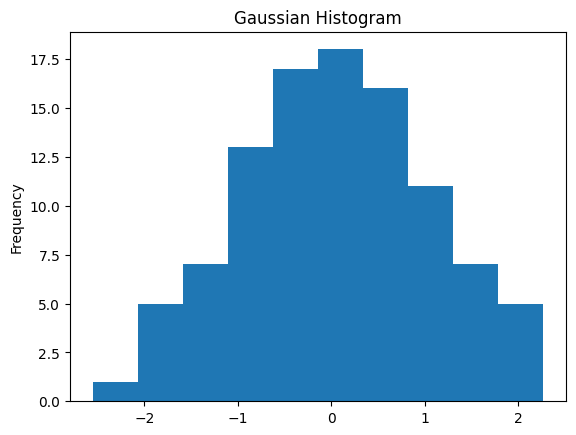

In [1]:
# Hello World

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

values = np.random.randn(100)
s = pd.Series(values)
s.plot(kind='hist', title='Gaussian Histogram')
plt.show()

In [2]:
s.describe()

count    100.000000
mean       0.059808
std        1.012960
min       -2.552990
25%       -0.643857
50%        0.094096
75%        0.737077
max        2.269755
dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random

range_list = list(range(1970, 2070))
random_list = random.sample(range(0, 100),100)
print(len(random_list), len(range_list))
df = pd.DataFrame({'years':range_list,'probability':random_list})
df.plot(x='years', y='probability', kind='bar')
plt.show()

import numpy as np

# Prepare
X = np.linspace(0, 4*np.pi, 1000)
Y = np.sin(X)

# Render
fig, ax = plt.subplots(1,1)
ax.plot(X,Y)
plt.show()

In [3]:
# Analisis

num_securities = 1000
num_periods = 1000
period_frequency = 'W'
start_date = '2010-01-01'

np.random.seed([3,1415])

means = [0,0]
cov = [[1,0.5],[0.5,1]]

m = np.random.multivariate_normal(means,cov,num_securities).T

# Leer el capitulo 2 de Learning pandas

In [4]:
# Capitulo 3, creando dataframes desde cero

new_df = pd.DataFrame(columns = ['A','B','C'])
# Esto es un dataframe de 3 columnas ABC

# Paso a agregar un solo dato dentro de la columna A

new_df.loc[0,'A'] = 1 # loc = localiza, 0 = indice, 'A' = columna
new_df.loc[1] = [2,3,4] # Esto agrega 3 datos a la fila 1
new_df.loc[0,'B'] = 8 # Esto agrega 1 dato a la columna B
new_df.loc[2] = {'A':3,'B':4,'C':5} # Esto agrega un diccionario a la fila 2
new_df


,A,B,C
0,1,8,NaN
1,2,3,4
2,3,4,5


In [5]:
df1 = pd.DataFrame({'A': ['A0', 'A1', ],'B': ['B0', 'B1',]})


df2 = pd.DataFrame({'B': ['B4'],'C': ['C4',]})

#df1.append(df2) esta deprecado, en su lugar hay que usar concat
#df1.append(df2, ignore_index=True)

pd.concat([df1,df2],ignore_index=True)

,A,B,C
0,A0,B0,NaN
1,A1,B1,NaN
2,NaN,B4,C4


In [6]:
pd.merge(df1,df2,how='left') # junta las columnas B y C de df2 al df1

,A,B,C
0,A0,B0,NaN
1,A1,B1,NaN


In [7]:
pd.merge(df1,df2,how='right') # junta las columnas B y C de df2 al df1
# Como consecuencia elimina filas porque df2 tiene menos filas

,A,B,C
0,NaN,B4,C4


In [8]:
# Indices de boolenaos en dataframes
# Se asigna un indice booleano 
df_bool = pd.DataFrame({'Color': ['Red','Blue','Red','Blue']},index=[True,False,True, False])
df_bool.loc[True] 
df_bool.iloc[1] # Localizacion por indice

Color    Blue
Name: False, dtype: object

In [9]:
# Mascara de booleanos para dataframes

df_roses = pd.DataFrame({ 'color': ['red','blue','red','blue'],'name': ['rose','violet','tulip','harebell'],'size': ['big','big','small','small']})
df_roses

# Leer el capitulo 4 de Learning pandas

,color,name,size
0,red,rose,big
1,blue,violet,big
2,red,tulip,small
3,blue,harebell,small


In [10]:
df_roses.dtypes

color    object
name     object
size     object
dtype: object

In [11]:
df_roses['size'] = df_roses['size'].astype('category')
df_roses.dtypes

color      object
name       object
size     category
dtype: object

In [12]:
# Correlaciones entre columnas
df_rand = pd.DataFrame(np.random.randn(1000, 3), columns=['a', 'b', 'c'])
df_rand.corr()

,a,b,c
a,1.000000,0.014953,0.010779
b,0.014953,1.000000,0.031397
c,0.010779,0.031397,1.000000


In [13]:
df_rand.corr(method='spearman')

,a,b,c
a,1.000000,0.011482,0.016851
b,0.011482,1.000000,0.028784
c,0.016851,0.028784,1.000000


In [14]:
# Creando dataframes
df = pd.DataFrame({'numbers': [1, 2, 3], 'colors': ['red', 'white', 'blue']})

# Estudiar el capitulo 7 y 8 de Learning pandas

In [15]:
new_df.loc[1].isnull()

A    False
B    False
C    False
Name: 1, dtype: bool

In [16]:
df_categorico = pd.DataFrame({'Name':['John Smith', 'Mary Brown', 'Coso'],
'Gender':['M', 'F', 'O'], 'Smoker':['Y', 'N', np.nan]})

df_categorico

,Name,Gender,Smoker
0,John Smith,M,Y
1,Mary Brown,F,N
2,Coso,O,NaN


In [17]:
df_categorico.isnull()

# para forzar a crear un dato NaN, se puede hacer con el tipo de dato None, pd.NA (Not Available) o np.nan (Not a Number)

,Name,Gender,Smoker
0,False,False,False
1,False,False,False
2,False,False,True


In [18]:
df_with_dummies = pd.get_dummies(df_categorico, columns=['Gender', 'Smoker'])
df_with_dummies

# Esto sirve para convertir columnas categoricas en grupos de columnas con booleanos
# En este caso se convirtio gender en gender_F y gender_M
# Y smoker en smoker_N y smoker_Y



,Name,Gender_F,Gender_M,Gender_O,Smoker_N,Smoker_Y
0,John Smith,False,True,False,False,True
1,Mary Brown,True,False,False,True,False
2,Coso,False,False,True,False,False


In [24]:
# Datos duplicados capitulo 11

df_a_duplicar = pd.DataFrame({'A':[1,2,3,3,5,6,1],'B':[6,7,8,9,0,2,1]})
# Duplicated, solo mira si los valores de una columna estan duplicados
mask = df_a_duplicar.A.duplicated(keep=False)


(mask)

0     True
1    False
2     True
3     True
4    False
5    False
6     True
Name: A, dtype: bool

In [27]:
# el parametro keep toma el primer valor duplicado como falso y la segunda vez como verdadero
mask_no_keep = df_a_duplicar.A.duplicated()
mask_no_keep

0    False
1    False
2    False
3     True
4    False
5    False
6     True
Name: A, dtype: bool

In [32]:
df_a_duplicar.loc[mask, 'B'] = 0
df_a_duplicar['C'] = df_a_duplicar.A.mask(mask, 0)
df_a_duplicar
# Esto realmente no tiene utilidad

,A,B,C
0,1,0,0
1,2,7,2
2,3,0,0
3,3,0,0
4,5,0,5
5,6,2,6
6,1,0,0


In [34]:
df_a_duplicar = df_a_duplicar.drop_duplicates()
df_a_duplicar
# Aparenta hacer algo pero no hace nada

,A,B,C
0,1,0,0
1,2,7,2
2,3,0,0
4,5,0,5
5,6,2,6


In [35]:
df_a_duplicar['B'] = df_a_duplicar['B'].drop_duplicates()
df_a_duplicar

# Solo se aplica a columnas


,A,B,C
0,1,0.0,0
1,2,7.0,2
2,3,NaN,0
4,5,NaN,5
5,6,2.0,6


In [37]:
df_a_duplicar = pd.DataFrame({'A':[1,2,3,3,5,6,1],'B':[6,7,8,9,0,2,1]})
df_a_duplicar.nunique() # Obtiene el numero de valores unicos

A    5
B    7
dtype: int64

In [39]:
df_a_duplicar.A.unique() # Obtiene los valores unicos

array([1, 2, 3, 5, 6])

In [44]:
df = pd.DataFrame({'Group': list('ABAABABAAB'),'ID': [1, 1, 2, 3, 3, 2, 1, 2, 1, 3]})
df_nuniques = df.groupby('Group')['ID'].nunique()
df_nuniques


Group
A    3
B    2
Name: ID, dtype: int64

In [49]:
df_unique = df.groupby('Group')['ID'].unique()
type(df_unique)

df.info(memory_usage='deep') # Muestra la informacion y el uso de memoria del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Group   10 non-null     object
 1   ID      10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 788.0 bytes


In [48]:
lista = df.columns.to_list() # Convierte el dataframe en una lista
lista

['Group', 'ID']

In [ ]:
# Gotchas o trampas
df=pd.DataFrame({'col':[1,np.nan]})
df==np.nan # No funciona


In [ ]:
df=pd.DataFrame({'col':[1,np.nan]})
df.isnull()

In [ ]:
# Integer and NA
## Pandas don't support missing in attributes of type integer. For example if you have missings in the
## grade column:
df= pd.read_csv("data.csv", dtype={'grade': int})
## error: Integer column has NA values

In [50]:
# Automatic Data Alignment (index-awared behaviour)
## If you want to append a series of values [1,2] to the column of dataframe df, you will get NaNs:
import pandas as pd
series=pd.Series([1,2])
df=pd.DataFrame(index=[3,4])
df['col']=series
df

,col
3,NaN
4,NaN


In [51]:
"""
because setting a new column automatically aligns the data by the indexe, and your values 1 and
2 would get the indexes 0 and 1, and not 3 and 4 as in your data frame:
"""
df=pd.DataFrame(index=[1,2])
df['col']=series
df


,col
1,2.0
2,NaN


In [53]:
# f you want to ignore index, you should set the .values at the end:
df['col']=series.values
df

,col
1,1
2,2


# Otras Librerias

## BLAS - Basic Linear Algebra Subrogram

## LAPACK - Linear Algebra Package